In [9]:
from google.colab import drive
drive.mount('/content/drive/')
path = "/content/drive/MyDrive/contest/atmacup/08/Code/Experiments/exp_000"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os.path as osp
import pickle
%matplotlib inline

In [6]:
def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.

    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importance()
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index#[:50]

    fig, ax = plt.subplots(figsize=(max(6, len(order) * .4), 7))
    sns.boxenplot(data=feature_importance_df, x='column', y='feature_importance', order=order, ax=ax, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.grid()
    fig.tight_layout()
    return fig, ax

(<Figure size 1814.4x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f831e249d68>)

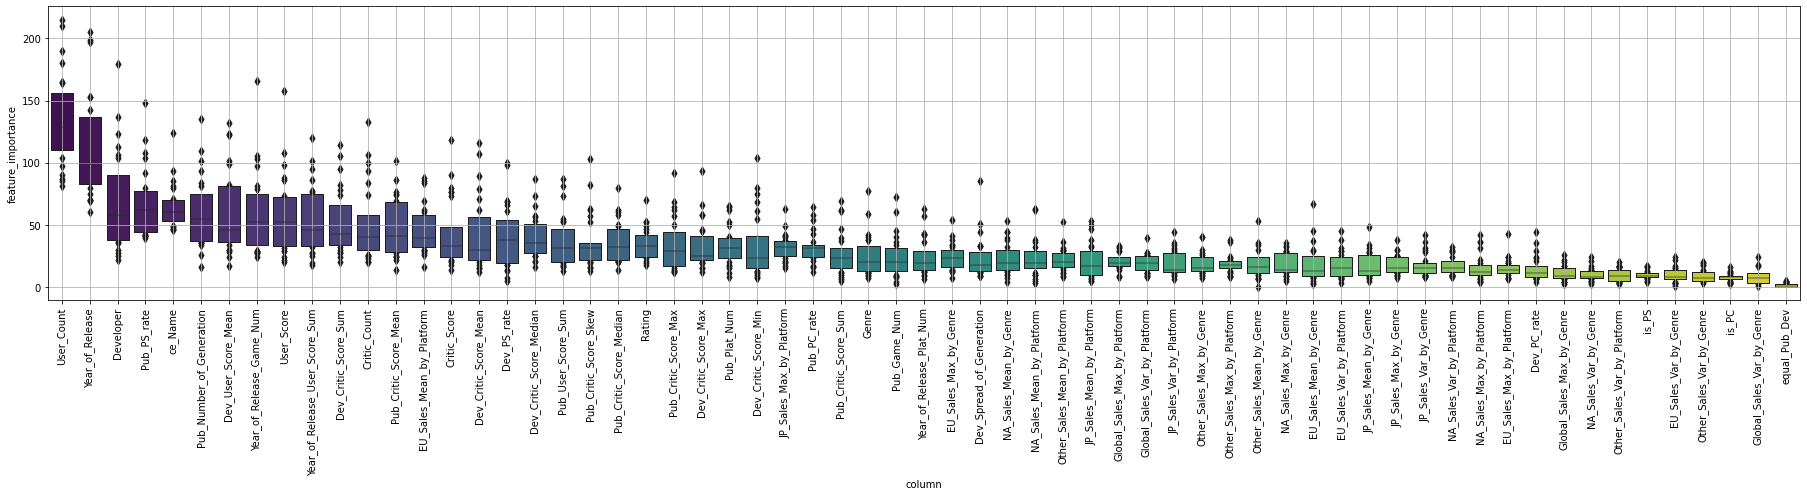

In [25]:

X = pd.read_csv(osp.join(path, "X.csv"))
models = []
weight_files = os.listdir(osp.join(path, "weight/"))
for file in weight_files:
    p = os.path.join(osp.join(path, "weight/"), file)
    model = pickle.load(open(p, 'rb'))
    models.append(model)
visualize_importance(models, X.drop("Publisher", axis=1))